In [1]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_colwidth', -1)

# Load Sizo Lines

In [3]:
import numpy as np
import pandas as pd
import os

base_dir = 'D:/Data'
excel_file = 'N68_2.xlsx'
excel_dir = os.path.join(base_dir, excel_file)

lines_df = pd.read_excel(excel_dir, encoding = 'ISO-8859-1',
                              sheet_name = 'Sheet1', 
                              header = 0, 
                              names = ['LineNumber','Text','Line_Num','Line', 'Pattern','Value'], 
                              dtype = { 'LineNumber': str, 
                                        'Line_Num': np.int64, 
                                        'Text': str, 
                                        'Line': str, 
                                        'Pattern': str, 
                                        'Value': np.int64 
                                       }, 
                              index_col = 'LineNumber', 
                              na_values = 'NaN', 
                              comment = '#')
lines_df

,Text,Line_Num,Line,Pattern,Value
LineNumber,,,,,
L10000011,가노라 가노라 임아 언양 단천의 풍월 강산으로 가노라 임아,1,ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱㅏㅇㅅㅏㄴㅇㅡㄹㅗ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ,NaN,1
L10019081,어듸야  소 모라 가는 노랑 듸궁이 더벙 머리,1,ㅇㅓㄷㅡㅣㅇㅑ ㅺㅣㄹㅺㅣㄹ ㅅㅗ ㅁㅗㄹㅏ ㄱㅏㄴㅡㄴ ㄴㅗㄹㅏㅇ ㄷㅡㅣㄱㅜㅇㅇㅣ ㄷㅓㅂㅓㅇ ㅁㅓㄹㅣ,NaN,1
L10022821,이년아 말 듯거라 굽고 나마 쟈질년아,1,ㅇㅣㄴㅕㄴㅇㅏ ㅁㅏㄹ ㄷㅡㅅㄱㅓㄹㅏ ㄱㅜㅂㄱㅗ ㄴㅏㅁㅏ ㅈㅑㅈㅣㄹㄴㅕㄴㅇㅏ,NaN,1
L10006771,눈아눈아 머르칠 눈아 두 손 장가락으로  질너 머르칠 눈아,1,ㄴㅜㄴㅇㅏㄴㅜㄴㅇㅏ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ ㄷㅜ ㅅㅗㄴ ㅈㅏㅇㄱㅏㄹㅏㄱㅇㅡㄹㅗ ㅺㅗㄱ ㅈㅣㄹㄴㅓ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ,NaN,1
L10007731,아 은 아 李太白이 노든 아,1,ㄷㆍㄹㅇㅏ ㅂㆍᇃㅇㅡㄴ ㄷㆍㄹㅇㅏ ㅇㅣㅌㅐㅂㅐㄱㅇㅣ ㄴㅗㄷㅡㄴ ㄷㆍㄹㅇㅏ,NaN,1
...,...,...,...,...,...
L10022011,우정워정며 歲月이 거의로다,1,ㅇㅜㅈㅓㅇㅇㅜㅓㅈㅓㅇㅎㆍㅁㅕ ㅅㅔㅇㅜㅓㄹㅇㅣ ㄱㅓㅇㅡㅣㄹㅗㄷㅏ,NaN,0
L10022361,渭城官 柳樹를 처음의 심근 은,1,ㅇㅜㅣㅅㅓㅇㄱㅗㅏㄴ ㅇㅠㅅㅜㄹㅡㄹ ㅊㅓㅇㅡㅁㅇㅡㅣ ㅅㅣㅁㄱㅡㄴ ㅼㅡㅇㅡㄴ,NaN,0
L10022711,銀河에 물이 지니 烏鵲橋 단말가,1,ㅇㅡㄴㅎㅏㅇㅔ ㅁㅜㄹㅇㅣ ㅈㅣㄴㅣ ㅇㅗㅈㅏㄱㄱㅛ ㅼㅡㄷㅏㄴㅁㅏㄹㄱㅏ,NaN,0


In [4]:
len(lines_df)

136

In [5]:
lines_df.nunique()

Text        136
Line_Num    1  
Line        135
Pattern     0  
Value       2  
dtype: int64

# Fn8 : to_word_chunk8

In [6]:
# 함수 : New Syllable centered word chunks(1개의 문장으로 만듦) - Train 용
# rule 1 : vowel + Blank("B로 표시") - 하나의 문장으로 만들기 위해 빈칸 더해 줌
# rule 2 : 2-5개 음절 chunk
# 중첩시킨 어절말음소

def to_word_chunk8(text_list): 
    test_list_new = []
    for each_item in text_list:
        each_list = each_item.split() 
        d=[]
        e =""    
        for each_word in each_list:
            if len(each_word)/3 < 1.7:
                e+=each_word[:3]+" "   
                e+=each_word[3:-2]+" " 
                e+=each_word[-2:]+"B "           
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            
            elif len(each_word)/3 >= 1.7 and  len(each_word)/3 < 3:
                e+=each_word[:3]+" " 
                e+=each_word[3:-2]+" "
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            elif len(each_word)/3 >=3 and len(each_word)/3 <5:
                e+=each_word[:3]+" "   
                e+=each_word[3:-4]+" "       
                e+=each_word[-4:-2]+" "
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            elif len(each_word)/3 >=5 and len(each_word)/3 <8:
                e+=each_word[:3]+" "   
                e+=each_word[3:5]+" "        
                e+=each_word[5:7]+" " 
                e+=each_word[7:-2]+" "
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            elif len(each_word)/3 >=8 and len(each_word)/3 <11:
                e+=each_word[:3]+" "   
                e+=each_word[3:5]+" "  
                e+=each_word[5:8]+" " 
                e+=each_word[8:12]+" "
                e+=each_word[12:15]+" " 
                e+=each_word[15:19]+" "
                e+=each_word[19:-2]+" "
                e+=each_word[-2:]+"B "   
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            else: 
                e+=each_word[:3]+" " 
                e+=each_word[3:5]+" "    
                e+=each_word[5:8]+" " 
                e+=each_word[8:12]+" "
                e+=each_word[12:15]+" " 
                e+=each_word[15:19]+" "
                e+=each_word[19:22]+" "
                e+=each_word[22:26]+" "
                e+=each_word[26:-2]+" "
                e+=each_word[-2:]+"B "
                e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
        test_list_new.append(e)
    return test_list_new

In [7]:
text = lines_df.iloc[:,2].values.tolist() 
chunked_text = to_word_chunk8(text)

In [8]:
lines_df["chunked_text"] = chunked_text

In [9]:
lines_df

,Text,Line_Num,Line,Pattern,Value,chunked_text
LineNumber,,,,,,
L10000011,가노라 가노라 임아 언양 단천의 풍월 강산으로 가노라 임아,1,ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱㅏㅇㅅㅏㄴㅇㅡㄹㅗ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ,NaN,1,ㄱㅏㄴ ㅗ ㄹㅏB ㅏB ㄱㅏㄴ ㅗ ㄹㅏB ㅏB ㅇㅣㅁ ㅇㅏB ㅏB ㅇㅓㄴ ㅇ ㅑㅇB ㅇB ㄷㅏㄴ ㅊㅓ ㄴㅇ ㅡㅣB ㅣB ㅍㅜㅇ ㅇㅜ ㅓㄹB ㄹB ㄱㅏㅇ ㅅㅏㄴ ㅇㅡ ㄹㅗB ㅗB ㄱㅏㄴ ㅗ ㄹㅏB ㅏB ㅇㅣㅁ ㅇㅏB ㅏB
L10019081,어듸야  소 모라 가는 노랑 듸궁이 더벙 머리,1,ㅇㅓㄷㅡㅣㅇㅑ ㅺㅣㄹㅺㅣㄹ ㅅㅗ ㅁㅗㄹㅏ ㄱㅏㄴㅡㄴ ㄴㅗㄹㅏㅇ ㄷㅡㅣㄱㅜㅇㅇㅣ ㄷㅓㅂㅓㅇ ㅁㅓㄹㅣ,NaN,1,ㅇㅓㄷ ㅡㅣ ㅇㅑB ㅑB ㅺㅣㄹ ㅺ ㅣㄹB ㄹB ㅅㅗ ㅅㅗB ㅗB ㅁㅗㄹ ㄹㅏB ㅏB ㄱㅏㄴ ㅡㄴB ㄴB ㄴㅗㄹ ㅏㅇB ㅇB ㄷㅡㅣ ㄱㅜㅇ ㅇㅣB ㅣB ㄷㅓㅂ ㅓㅇB ㅇB ㅁㅓㄹ ㄹㅣB ㅣB
L10022821,이년아 말 듯거라 굽고 나마 쟈질년아,1,ㅇㅣㄴㅕㄴㅇㅏ ㅁㅏㄹ ㄷㅡㅅㄱㅓㄹㅏ ㄱㅜㅂㄱㅗ ㄴㅏㅁㅏ ㅈㅑㅈㅣㄹㄴㅕㄴㅇㅏ,NaN,1,ㅇㅣㄴ ㅕㄴ ㅇㅏB ㅏB ㅁㅏㄹ ㅏㄹB ㄹB ㄷㅡㅅ ㄱㅓ ㄹㅏB ㅏB ㄱㅜㅂ ㄱㅗB ㅗB ㄴㅏㅁ ㅁㅏB ㅏB ㅈㅑㅈ ㅣㄹㄴ ㅕㄴ ㅇㅏB ㅏB
L10006771,눈아눈아 머르칠 눈아 두 손 장가락으로  질너 머르칠 눈아,1,ㄴㅜㄴㅇㅏㄴㅜㄴㅇㅏ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ ㄷㅜ ㅅㅗㄴ ㅈㅏㅇㄱㅏㄹㅏㄱㅇㅡㄹㅗ ㅺㅗㄱ ㅈㅣㄹㄴㅓ ㅁㅓㄹㅡㅊㅣㄹ ㄴㅜㄴㅇㅏ,NaN,1,ㄴㅜㄴ ㅇㅏㄴ ㅜㄴ ㅇㅏB ㅏB ㅁㅓㄹ ㅡㅊ ㅣㄹB ㄹB ㄴㅜㄴ ㅇㅏB ㅏB ㄷㅜ ㄷㅜB ㅜB ㅅㅗㄴ ㅗㄴB ㄴB ㅈㅏㅇ ㄱㅏㄹㅏㄱ ㅇㅡ ㄹㅗB ㅗB ㅺㅗㄱ ㅗㄱB ㄱB ㅈㅣㄹ ㄴㅓB ㅓB ㅁㅓㄹ ㅡㅊ ㅣㄹB ㄹB ㄴㅜㄴ ㅇㅏB ㅏB
L10007731,아 은 아 李太白이 노든 아,1,ㄷㆍㄹㅇㅏ ㅂㆍᇃㅇㅡㄴ ㄷㆍㄹㅇㅏ ㅇㅣㅌㅐㅂㅐㄱㅇㅣ ㄴㅗㄷㅡㄴ ㄷㆍㄹㅇㅏ,NaN,1,ㄷㆍㄹ ㅇㅏB ㅏB ㅂㆍᇃ ㅇ ㅡㄴB ㄴB ㄷㆍㄹ ㅇㅏB ㅏB ㅇㅣㅌ ㅐㅂ ㅐㄱ ㅇㅣB ㅣB ㄴㅗㄷ ㅡㄴB ㄴB ㄷㆍㄹ ㅇㅏB ㅏB
...,...,...,...,...,...,...
L10022011,우정워정며 歲月이 거의로다,1,ㅇㅜㅈㅓㅇㅇㅜㅓㅈㅓㅇㅎㆍㅁㅕ ㅅㅔㅇㅜㅓㄹㅇㅣ ㄱㅓㅇㅡㅣㄹㅗㄷㅏ,NaN,0,ㅇㅜㅈ ㅓㅇ ㅇㅜ ㅓㅈㅓㅇㅎㆍ ㅁㅕB ㅕB ㅅㅔㅇ ㅜㅓㄹ ㅇㅣB ㅣB ㄱㅓㅇ ㅡㅣ ㄹㅗ ㄷㅏB ㅏB
L10022361,渭城官 柳樹를 처음의 심근 은,1,ㅇㅜㅣㅅㅓㅇㄱㅗㅏㄴ ㅇㅠㅅㅜㄹㅡㄹ ㅊㅓㅇㅡㅁㅇㅡㅣ ㅅㅣㅁㄱㅡㄴ ㅼㅡㅇㅡㄴ,NaN,0,ㅇㅜㅣ ㅅㅓㅇ ㄱㅗ ㅏㄴB ㄴB ㅇㅠㅅ ㅜㄹ ㅡㄹB ㄹB ㅊㅓㅇ ㅡㅁㅇ ㅡㅣB ㅣB ㅅㅣㅁ ㄱ ㅡㄴB ㄴB ㅼㅡㅇ ㅡㄴB ㄴB
L10022711,銀河에 물이 지니 烏鵲橋 단말가,1,ㅇㅡㄴㅎㅏㅇㅔ ㅁㅜㄹㅇㅣ ㅈㅣㄴㅣ ㅇㅗㅈㅏㄱㄱㅛ ㅼㅡㄷㅏㄴㅁㅏㄹㄱㅏ,NaN,0,ㅇㅡㄴ ㅎㅏ ㅇㅔB ㅔB ㅁㅜㄹ ㅇㅣB ㅣB ㅈㅣㄴ ㄴㅣB ㅣB ㅇㅗㅈ ㅏㄱ ㄱㅛB ㅛB ㅼㅡㄷ ㅏㄴㅁ ㅏㄹ ㄱㅏB ㅏB


In [10]:
lines_df_small = lines_df.head(130)

In [11]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess

def text_to_tokens(text):
    text = text.lower()
    text = remove_stopwords(text)
    tokens = simple_preprocess(text)
    return tokens

In [12]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents

In [13]:
documents_dataset = DocumentDataset(lines_df_small, 'chunked_text')

# Document Vector Model 적용

In [14]:
docVecModel = Doc2Vec(min_count=2, window=10, vector_size=100, sample=1e-4, negative=2, workers=8) #sample=1e-4,
docVecModel.build_vocab(documents_dataset.tagged_documents())
# min_count=3, window=10, vector_size=50, sample=1e-4, negative=2, workers=8 -> ('L10016581', 0.853701114654541), ('L10007691', 0.5858792066574097),
# min_count=1, window=10, vector_size=50, sample=1e-4, negative=2, workers=8 ->('L10016581', 0.665807843208313), ('L10014621', 0.5199353694915771), 잘 맞음
# min_count=1, window=10, vector_size=100, sample=1e-4, negative=2, workers=8 -> ('L10016581', 0.7407584190368652), ('L10016591', 0.5202860832214355), 잘 맞음
# min_count=1, window=10, vector_size=150, sample=1e-4, negative=2, workers=8 벡터가 커져도 일치도는 변화 없음

In [15]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=1000)

In [16]:
docVecModel.corpus_count

130

In [17]:
docVecModel.save('../data/SizoChunkedLinesModel.d2v')

In [18]:
docVecModel = Doc2Vec.load('../data/SizoChunkedLinesModel.d2v')

In [20]:
docVecModel['L10007731']

array([-0.13330726,  0.06031567, -0.0911858 ,  0.19694135, -0.1434537 ,
       -0.24282064,  0.05468263, -0.06267934,  0.07860897,  0.25021777,
       -0.13808441,  0.09129216, -0.02636571, -0.06674604, -0.07423063,
        0.04545342,  0.08558933, -0.14682543, -0.02921638, -0.00503397,
        0.0210034 , -0.09704758, -0.06835849,  0.18219884, -0.06118558,
        0.10739374,  0.17541733,  0.19536456,  0.04859027,  0.13130948,
       -0.11622944, -0.06311768,  0.09814034, -0.04259322,  0.18070802,
        0.03859518,  0.0256357 , -0.09468939, -0.18415755,  0.01103759,
       -0.12459339, -0.03997632, -0.02561432,  0.10777263, -0.06482658,
        0.09385089, -0.09937617,  0.04319292, -0.05160316,  0.05733137,
        0.08790422,  0.21754074, -0.01073276,  0.14548922,  0.03696307,
        0.10592205, -0.0245093 ,  0.00955591,  0.1150939 , -0.02899801,
       -0.11643052,  0.15547998, -0.0741892 ,  0.11651801,  0.08985911,
       -0.30019084,  0.11341715, -0.07869408,  0.00246066,  0.09

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False, 
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
    
def show_Sizo_line(line_number):
    line = lines_df_small.loc[line_number].chunked_text  
    Text = lines_df_small.loc[line_number].Text
    doc_vector = docVecModel.docvecs[line_number]
    show_image(doc_vector, line) 
    

ㄷㆍㄹ  ㅇㅏB ㅏB ㅂㆍᇃ ㅇ ㅡㄴB ㄴB ㄷㆍㄹ  ㅇㅏB ㅏB ㅇㅣㅌ ㅐㅂ ㅐㄱ ㅇㅣB ㅣB ㄴㅗㄷ  ㅡㄴB ㄴB ㄷㆍㄹ  ㅇㅏB ㅏB 


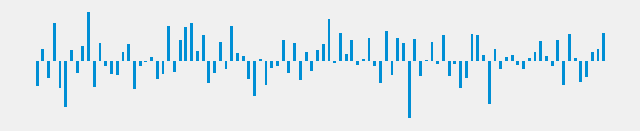

In [22]:
show_Sizo_line('L10007731')

In [23]:
docVecModel.docvecs.most_similar('L10007731')

[('L10016581', 0.8278400897979736),
 ('L10026321', 0.5479141473770142),
 ('L10016591', 0.38912442326545715),
 ('L10015371', 0.3820744454860687),
 ('L10010171', 0.37079793214797974),
 ('L10006771', 0.36246156692504883),
 ('L10013301', 0.3610727787017822),
 ('L10007691', 0.3551172912120819),
 ('L10013281', 0.3124657869338989),
 ('L10013311', 0.31227684020996094)]

ㅅㅗㅅ ㅏㅇㄱ ㅏㅇB ㅇB ㄷㆍㄹ  ㆍㄹB ㄹB ㅂㆍᇃ ㅇ ㅡㄴB ㄴB ㅂㅏㅁ ㅇ ㅡㅣB ㅣB ㄷㅗㄹ ㅏㅇ ㅗㄴ ㅡㄴB ㄴB ㅈㅓ  ㅈㅓB ㅓB ㄱㅣㄹ ㅓㄱ ㅇㅏB ㅏB 


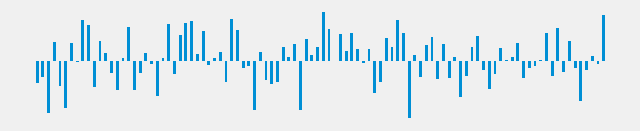

In [24]:
show_Sizo_line('L10016581')

In [25]:
docVecModel['L10019151']

array([-0.11760285, -0.14380264,  0.07191776, -0.15463974,  0.0736655 ,
        0.3777529 , -0.6180476 , -0.17160656, -0.30704713,  0.13191849,
       -0.10593977,  0.21283181, -0.1419555 ,  0.318927  , -0.06074937,
        0.04647856,  0.2678719 , -0.02459206, -0.17302239,  0.26499525,
       -0.24186935,  0.16826415, -0.5807901 ,  0.50229937,  0.40369147,
        0.40495545, -0.02576751, -0.08942551, -0.53439623, -0.4137669 ,
       -0.07136744,  0.11544584,  0.33703145,  0.53688544, -0.13521832,
        0.72541845,  0.0754529 ,  0.37659433, -0.2966865 ,  0.00770572,
       -0.3555441 ,  0.46390018,  0.34894785,  0.0434403 , -0.788906  ,
        0.03767423, -0.07814221,  0.33518702, -0.28682873,  0.43633935,
       -0.35575753, -0.4331421 ,  0.3638038 , -0.02840321,  0.32018653,
        0.6383834 , -0.02140517, -0.04895431, -0.29939473,  0.09421057,
        0.3352804 , -0.66872776,  0.90732384, -0.42473337, -0.3191808 ,
       -0.12206651,  0.22100823,  0.15818179,  0.23947442,  0.57

In [26]:
def to_vector(sentence):
    cleaned = preprocess_string(sentence)
    docVector = docVecModel.infer_vector(cleaned)
    return docVector

ㄷㆍㄹ  ㅇㅏB ㅏB ㅂㆍᇃ ㅇ ㅡㄴB ㄴB ㄷㆍㄹ  ㅇㅏB ㅏB ㅇㅣㅌ ㅐㅂ ㅐㄱ ㅇㅣB ㅣB ㄴㅗㄷ  ㅡㄴB ㄴB ㄷㆍㄹ  ㅇㅏB ㅏB 


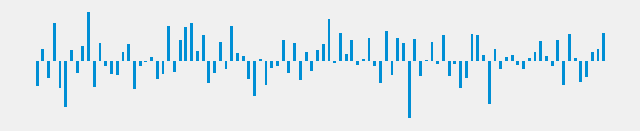

In [27]:
show_Sizo_line('L10007731')

ㅇㅓㄹㅡㄴㅈㅑ ㄴㅓㅊㅜㄹㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅏㄱㄴㅓㅊㅜㄹㅣㅇㅑ


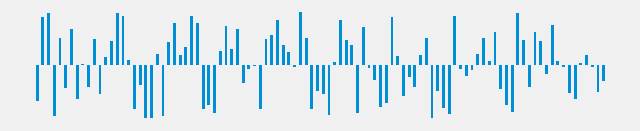

In [28]:
line = "ㅇㅓㄹㅡㄴㅈㅑ ㄴㅓㅊㅜㄹㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅏㄱㄴㅓㅊㅜㄹㅣㅇㅑ"
show_image(to_vector("ㅇㅓㄹㅡㄴㅈㅑ ㄴㅓㅊㅜㄹㅣㅇㅑ ㅇㅔㅇㅓㄹㅡㄴㅈㅑ ㅂㅏㄱㄴㅓㅊㅜㄹㅣㅇㅑ"), line)

In [29]:
def similar_Sizo_lines(sentence):
    vector = to_vector(sentence)
    similar_vectors = docVecModel.docvecs.most_similar(positive=[vector])
    similar_lines = [ lines_df.loc[line[0]].Text for line in similar_vectors]
    return similar_lines

similar_Sizo_lines("ㄷㆍㄹ  ㅇㅏB ㅏB ㅂㆍᇃ ㅇ ㅡㄴB ㄴB ㄷㆍㄹ  ㅇㅏB ㅏB ㅇㅣㅌ ㅐㅂ ㅐㄱ ㅇㅣB ㅣB ㄴㅗㄷ  ㅡㄴB ㄴB ㄷㆍㄹ  ㅇㅏB ㅏB ")

['\ue38f아 \ue650은 \ue38f아 李太白이 노든 \ue38f아',
 '瀟湘江 \ue38f \ue650은 밤의 도라오는 저 기럭아',
 '珠簾에 비쵠 \ue38f과 멀리 오\ue285 笛소\ue487야',
 '瀟湘江 細雨中에 삿갓 쓴 져 老翁아',
 '머리를 고텨 뀌워 玉簪은 \ue1a7라고죄',
 '北海上 찬 바\ue477에 울고 오는 져 기럭아',
 '서리 티고 별 성긘제 울며 가는 져 기럭아',
 '눈아눈아 머르칠 눈아 두 손 장가락으로 \ue9e2 질너 머르칠 눈아',
 '空山風雲夜에 도라오는 져 \ue97d\ue477아',
 '北海上 片紙傳튼 蘇中郞에 기러기야']

In [30]:
lines_df_small.loc['L10007731'].Text

'\ue38f아 \ue650은 \ue38f아 李太白이 노든 \ue38f아'